# Developing Autonomous Agents in Practice with LangChain

---

**Speaker:** Gianluca Aguzzi  
**Email:** gianluca.aguzzi@unibo.it  
**GitHub:** [cric96](https://github.com/cric96)



## About Me
<div style="display: flex; align-items: center; gap: 30px;">

<div style="flex-shrink: 0;">
    <img src="data/myself.jpeg" alt="Gianluca Aguzzi" style="border-radius: 50%; height: 150px; object-fit: cover;">
</div>
<div style="flex: 1;">

### Gianluca Aguzzi

- 🎓 _Postdoctoral Researcher_ at the University of Bologna
- 🔬 Research Interests:
    - Engineering *Large Scale* Distributed Systems
    - Software Engineering 3.0 (*LLMs*, AI-assisted development)
    - Application of AI in software engineering practices

</div>
</div>

Ok, let's dive into LangChain and discover how to build applications with LLMs! 😊

## Autonomous Agents
> **Autonomous agents** are <u>software entities</u> that can perform *tasks* or make decisions **without human intervention**.


- **Autonomous?**
    - Operate *independently*, making decisions based on their *programming* and *learned* experiences (via environment interactions).
- This is a **long-standing research topic in AI**
- Recently, **LLMs** have been used to create agents (perhaps not completely autonomous)
- **How can LLMs be conceived as _agents_?**

## LLM - In a Nutshell
> A **Language Model** is a Machine Learning model which is able to **understand and generate human language**

- **How does it work internally?**
    - Long story, please look at:
    - ... But in a nutshell, it takes a sentence and tries to **predict the next token**
- **Only that?**
    - Yes (more or less), an LM has **no _memory_**, **no _environment interaction_**, or anything else
- ... But we can **instrument these models to use external tools** (or to be **chained** with each other) to make them **powerful agents**! 😊


## LLMs Panorama: How to Use Them? 🌐🤖

Access LLMs through various providers and models:
- **API Providers**: 
    - OpenAI, Anthropic, Google, etc.
- **Open Source Models** (HuggingFace): 
    - Llama 2, Falcon, Mistral, etc.

- **Goals**:
    - Seamlessly switch between providers. 🔄
    - Flexibly use different models. 🛠️
    - Integrate multiple providers for diverse use cases. 🌈


## LLM Applications: How to Build Them? 
- Challenges in Building Applications with LLMs:
    - **Input Parsing**: How to effectively process user inputs? 
    - **Output Formatting**: How to structure responses for clarity and usability? 
    - **Error Handling**: How to manage unexpected behaviors or failures? 
    - **Conversation Management**: How to maintain context in multi-turn interactions? 
    - **External Data Integration**: How to connect with databases, APIs, or other data sources? 
    - **Workflow Orchestration**: How to seamlessly integrate multiple steps or components? 


**Solution**: This is where **LangChain** excels! 

## LangChain - Overview 
> **The** platform for reliable agents

<p align="center">
    <img src="data/base.png" alt="LangChain Overview" style="display: block; margin: 0 auto; width: 50%;">
</p>

<p align="center">
    <a href="https://www.langchain.com/" target="_blank" style="font-size:1.3em; font-weight:bold; text-decoration:none;">
        🌐 Visit the LangChain Website &rarr; langchain.com
    </a>
</p>


## LangChain - Models

**LangChain provides a _unified interface_ for interacting with a wide range of Large Language Models (LLMs):**

- **Supports major providers** such as **OpenAI**, **Anthropic**, **Google**, and a variety of open-source models from **HuggingFace**.
- **Enables seamless integration** of different LLMs within a single application.
- **Includes support for embeddings**, which are essential for tasks like semantic search, text similarity, and information retrieval.

<p align="center">
    <img src="data/models.png" alt="LangChain Overview" style="display: block; margin: 0 auto; width: 50%;">
</p>

### LLMs providers
- An LLM is essentially a **function** that takes a string as input and returns a string as output.
- The main method to interact with an LLM is the `invoke` method:
- This provides a **uniform interface** to interact with LLMs, regardless of the provider or model used.

<p align="center">
    <img src="data/invoke.png" alt="Base Api" style="display: block; margin: 0 auto; width: 50%;">
</p>


### Ollama
Is a local LLM provider that allows you to run models on your own machine.
See [Ollama](https://ollama.com/) for more details.


In [1]:
# import langchain gemini and ollama
from langchain_ollama.llms import OllamaLLM
qwen = OllamaLLM(model="qwen2.5:1.5b")
# Example query
qwen.invoke("Explain machine learning in simple terms (max 50 words)")  


'Machine learning is a branch of artificial intelligence that allows computers to learn from data without being explicitly programmed. It involves using algorithms and statistical models to make predictions or decisions based on patterns found in the input data, improving as it processes more examples.'

### Gemini
- **Gemini** is a chat-oriented language model developed by Google.
- Designed for multi-turn conversations and advanced dialogue management.
- Suitable for tasks requiring context retention and conversational flow.
- For usage details, refer to [Google AI Studio](https://aistudio.google.com/prompts/new_chat).

In [2]:
# Same for gemini
from dotenv import load_dotenv # used to load environment variables
load_dotenv()  # Load environment variables from .env file
from langchain_google_genai import GoogleGenerativeAI
gemini = GoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
gemini.invoke("Explain machine learning in simple terms (max 50 words)")  # Example query

'Machine learning teaches computers to learn from data without explicit programming. It identifies patterns and makes predictions or decisions based on that data, improving its accuracy over time.'

### Base Language Model

- **Abstract base class** in LangChain for all LLMs.
- Ensures a **unified interface** across providers.
- Every LLM provider **implements this class** for compatibility.

<p align="center">
        <img src="data/base-structure.png" alt="Structure" style="display: block; margin: 0 auto; width: 50%;">
</p>


In [3]:
from langchain_core.language_models.base import BaseLanguageModel

def explain_topic(llm: BaseLanguageModel, topic: str) -> str:
    """ A general explain topic functionality base on an LLM"""
    query = f"Explain {topic} in simple terms? (max 50 words)"
    response = llm.invoke(query)
    return response

In [4]:
explain_topic(gemini, "London"), explain_topic(qwen, "London")

("London is the capital of England and the United Kingdom. It's a huge, diverse city with a rich history, famous landmarks like Big Ben and Buckingham Palace, and a vibrant cultural scene. It's a global hub for finance, fashion, and the arts.",
 "London is the capital city of England and the United Kingdom. It's known for its historic landmarks like Big Ben and Buckingham Palace, modern skyscrapers, and vibrant culture including music, theater, and art. The city has a rich history dating back centuries with contributions to technology, literature, and politics.")

### Chat Models
- **Normal LLMs** are seen as simple __stateless__ functions.
- **Chat models** are more advanced: they can handle **conversations** with multiple turns.
- **How?**
    - They use a **list of messages** as input, where each message has a role (**user**, **assistant**, **system**, etc.).
- The `invoke` method is used to send a list of messages to the model and get a response.
- **Note:**  
    - Even for chat models, the model itself is **stateless**: the conversation history is **not stored by the model**—it's up to the user (or application) to manage and provide the history.

<p align="center">
    <img src="data/overview-chat-models.png" alt="Structure" style="display: block; margin: 0 auto; width: 50%;">
</p>



### Chat Models vs BaseModel
| Aspect                   | Base Model           | Chat Model                  |
| ------------------------ | -------------------- | --------------------------- |
| **Input**                | Plain text prompt    | List of structured messages |
| **Designed for**         | One-shot completions | Multi-turn conversations    |
| **Output**               | Text completion      | Message object              |
| **Classes in LangChain** | `BaseLanguageModel`                | `BaseChatModel`                 |


In [5]:
# Chat models
from langchain_google_genai import ChatGoogleGenerativeAI
chat_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
chat_gemini.invoke("Explain machine learning in simple terms")  # Example query

AIMessage(content='Imagine you\'re teaching a dog a new trick, like "fetch." You don\'t tell the dog exactly how to run, grab the ball, and bring it back. Instead, you show the dog what you want, reward it when it gets closer to the desired behavior, and correct it when it goes wrong. Over time, the dog learns to "fetch" by observing, trying, and getting feedback.\n\n**Machine learning is similar!**\n\nInstead of a dog, we have a computer. Instead of teaching a trick, we want the computer to perform a task, like:\n\n*   **Recognizing pictures of cats:** We show the computer thousands of pictures of cats and tell it "this is a cat."\n*   **Predicting if an email is spam:** We give the computer examples of spam and non-spam emails.\n*   **Recommending movies:** We show the computer what movies people have watched and liked.\n\n**Here\'s the breakdown:**\n\n1.  **Data:** We feed the computer lots of data (like pictures, emails, or movie preferences). This is like showing the dog what "fet

### Embeddings

- **Embeddings** are numerical representations of text that capture semantic meaning.
- They are specialized language models designed to represent text as vectors, rather than generate text.
- Embeddings are used for various purposes, such as **augmenting LLM context**, **semantic search**, **clustering**, and similarity analysis.

<p align="center">
    <img src="data/embeddings.png" alt="Structure" style="display: block; margin: 0 auto; width: 50%;">
</p>

### Embeddings - Semantics
- **What does it mean to _capture semantics_?**
- In the context of **embeddings**, *semantics* refers to the **meaning** and **relationships** between words or phrases.
- As illustrated in the image below, **words with similar meanings are positioned close to each other** in the vector space.
- By applying **distance** or **similarity measures**, we can identify words or texts that are *semantically related*.

<p align="center">
    <img src="data/embeddings-semantics.png" alt="Structure"  style="display: block; margin: 0 auto; width: 50%;">
</p>

In [6]:
# Embedings
from langchain_google_genai.embeddings import GoogleGenerativeAIEmbeddings

google_embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
google_embeddings.embed_query("What is the weather like in London?")[:5]

[-0.024339474737644196,
 0.019421163946390152,
 -0.005040269810706377,
 -0.021117379888892174,
 -0.030608780682086945]

### Embeddings - Visual Example of Semantic Similarity

- The dataset contains a list of questions and answers on **three distinct topics**.
- For each question and answer, we compute the corresponding **embeddings**.
- We then use **PCA** to project the embeddings into two dimensions and **visualize** whether clusters emerge.


In [7]:
import pandas as pd
df = pd.read_csv("data/dataset.csv", delimiter=";")  # Example of reading a CSV file with pandas
df.head()

,Topic,Question,Answer
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves)
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake


In [8]:
# We add embedding to the pandas dataframe
from langchain_core.embeddings import Embeddings
def embed_row(row: pd.Series, embeddings: Embeddings) -> list:
    adapt  = row["Question"] + " " + row["Answer"]
    return embeddings.embed_query(adapt)

df["embeddings"] = df.apply(lambda row: embed_row(row, google_embeddings), axis=1)
df.head()  # Display the first few rows of the DataFrame with embeddings

,Topic,Question,Answer,embeddings
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki,"[-0.06318295747041702, -0.025433462113142014, ..."
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan,"[-0.016836581751704216, -0.02863299660384655, ..."
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves),"[-0.05141858384013176, 0.014148241840302944, 0..."
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno,"[-0.0174933560192585, -0.008309093303978443, 0..."
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake,"[-0.0031194821931421757, -0.05045430734753609,..."


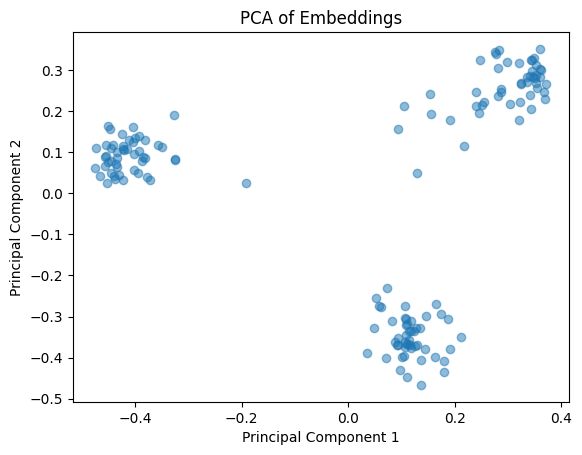

In [9]:
# PCA + rendering 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(list(df["embeddings"]))

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Prompts
- **Definition:** A **prompt** is a structured input that **guides** the LLM to generate the desired output.
- **Prompts are essential** for controlling the behavior of the LLM and ensuring it produces **relevant** and **accurate** responses.
- **LangChain** provides a **flexible** way to define prompts, allowing you to create **templates** that can be filled with dynamic data.

<p align="center">
    <img src="data/prompts.png" alt="Prompt Engineering in LangChain"  style="display: block; margin: 0 auto; width: 50%;">
</p>

### Prompts - Pratical Example
A prompt is a text with some `holes` (template) that can be filled with dynamic data.

In [10]:
# Prompts
template = """
Translate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:

{text}
"""
template

'\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'

### Prompt Template

> **In LangChain, prompt templates are the *foundation* for dynamic, reusable, and powerful LLM interactions!**

A `PromptTemplate` lets you define a prompt with *placeholders* that can be filled at runtime, enabling you to:

- **Dynamically generate prompts** for different tasks and inputs.
- **Reuse prompt logic** across multiple workflows.
- **Control the structure and clarity** of your LLM requests.

**Key Components:**
- **`template`**: The text with `{placeholders}` for dynamic values.
- **`input_variables`**: The list of variable names to fill in the template.
- **`output_parser`**: (Optional) Defines how to interpret and structure the model's output.

> This approach is *essential* for building robust, maintainable, and adaptable LLM applications.

<p align="center">
    <img src="data/structure_of_prompts.png" alt="PromptTemplate Structure"  style="display: block; margin: 0 auto; width: 50%;">
</p>

In [11]:
from langchain.prompts import ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_template(template)
prompt_template.input_variables, prompt_template.messages[0].prompt

(['style', 'target_language', 'text'],
 PromptTemplate(input_variables=['style', 'target_language', 'text'], input_types={}, partial_variables={}, template='\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'))

### Example: Prompt for Translation in a Certain Style/Language

In [12]:
prompt_template.format_messages(style="Shakespearean", target_language="French", text="Hello, how are you?")

[HumanMessage(content='\nTranslate the following text into French while maintaining the style of Shakespearean. Reply just with the translation:\n\nHello, how are you?\n', additional_kwargs={}, response_metadata={})]

In [13]:
def translate_text(llm: BaseLanguageModel, text: str, style: str, target_language: str) -> str:
    prompt = prompt_template.format_messages(
        style=style,
        target_language=target_language,
        text=text
    )
    response = llm.invoke(prompt)
    return response

translate_text(gemini, "Hello, how are you?", "a normal conversation", "French"), translate_text(gemini, "Hello, how are you?", "elegant and noble", "Italian")

('Salut, comment ça va ?', 'Salute, come state?')

## Structured Output
- **Definition:** Structured output refers to a specific, predefined format that the LLM is expected to generate in response to a prompt.

<p align="center">
    <img src="data/structured.png" alt="Structured Output Example" style="display: block; margin: 0 auto; width: 50%;">
</p>

### Output: Why Structured?
- **Structured output is essential for reliably parsing and integrating LLM results into other applications or workflows.**
- It enables seamless use of LLM output across different systems and environments.

---

### 🚩 Task: Extracting Cognitive Load from Text

- **Goal:** Extract the cognitive load from a given text.
- **Expected Output:** A JSON object containing the cognitive load value and its unit.

**Output Example:**


In [14]:
## Output parser
{
    "cognitive_load": 10,
    "language": "English",
    "style": "Aristocratic",
    "text": "Hello, how are you?"
}

{'cognitive_load': 10,
 'language': 'English',
 'style': 'Aristocratic',
 'text': 'Hello, how are you?'}

### Zero-Shot Prompting for Structured Output

- **Goal:** Guide the LLM to produce structured outputs by describing the expected format and required information.
- **Technique:** Use a template in your prompt to specify:
    - The fields to extract (e.g., cognitive load, language, style, text)
    - The output format (e.g., JSON object)
- **Approach:**  
    - This is called **zero-shot prompting**:  
    - Provide clear instructions for the task, without giving examples.

In [15]:
review_template = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

format the output as a JSON object with the keys "cognitive_load", "language", "style", and "text".

text: {text}
"""

- Does this *zero-shot* approach works?
- Kind of :))

In [16]:
simple_text = "Hello, how are you?"
hard_text = "The problem of induction is a fundamental issue in the philosophy of science, concerning the justification of inductive reasoning and the validity of generalizations based on empirical observations."

message_template_chat = ChatPromptTemplate.from_template(review_template)
response = chat_gemini.invoke(message_template_chat.format_messages(text=simple_text))
response.content
# How to parse it?

'```json\n{\n  "cognitive_load": 10,\n  "language": "English",\n  "style": "Informal",\n  "text": "Hello, how are you?"\n}\n```'

Ok, it is a valid json but how i can use it?

## Response Schema & Structured Output Parser

- **Response Schema**: Defines expected output fields (name, description, type) for LLM responses.
- **Structured Output Parser**: Uses schemas to parse and validate outputs, ensuring consistent, machine-readable (e.g., JSON) results.

**Why use them?**
- Reliable, error-free extraction of structured data.
- Simplifies integration and downstream processing.


In [17]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

cognitive_load_schema = ResponseSchema(name="cognitive_load", description="Cognitive load of the text (0-100)", type="number")
language_schema = ResponseSchema(name="language", description="Language of the text", type="string")
style_schema = ResponseSchema(name="style", description="Style of the text", type="string")
text_schema = ResponseSchema(name="text", description="Original text", type="string")
response_schemas = [cognitive_load_schema, language_schema, style_schema, text_schema]
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [18]:
# Review template (with instructions)
review_template_instructions = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

text: {text}

{format_instructions}
"""


In [19]:
from langchain_core.language_models.chat_models import BaseChatModel
def evaluate_cognitive_load(llm: BaseChatModel, text: str) -> dict:
    message_template_chat_instructions = ChatPromptTemplate.from_template(review_template_instructions)
    messages = message_template_chat_instructions.format_messages(text=text, 
                                format_instructions=output_parser.get_format_instructions())
    return output_parser.parse(chat_gemini.invoke(messages).content)

In [22]:
evaluate_cognitive_load(chat_gemini, simple_text)["cognitive_load"], evaluate_cognitive_load(chat_gemini, hard_text)["cognitive_load"]

(5, 65)

### Memory
- **Definition**: Memory in LangChain allows you to store and retrieve information across multiple interactions
- **Purpose**: It enables the LLM to maintain context and continuity in conversations, making it more effective for multi-turn interactions.
- Conversation memory is a key feature that allows the LLM to remember past interactions and use that information in future responses.

<p align="center">
    <img src="data/memory.png" alt="LangChain Memory Overview"  style="display: block; margin: 0 auto; width: 50%;">
</p>

### Memory types
- Several types of memory are available, including:
    - **Conversation Memory**: Stores the history of interactions in a conversation.
    - **Buffer Memory**: Temporarily holds information during a session.
    - **Summary Memory**: Summarizes past interactions to maintain context without storing all details

<p align="center">
    <img src="data/memory-uml.png" alt="Types of Memory in LangChain"  style="display: block; margin: 0 auto; width: 50%;">
</p>

In [ ]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

memory = ConversationBufferMemory()

/tmp/ipykernel_3919767/4278559334.py:4: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


### Conversation Chain
- A conversation chain is a sequence of interactions between the user and the LLM, where each interaction builds upon the previous ones.

In [ ]:
conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=True
)

conversation.invoke("Hi! My name is Gianluca")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi! My name is Gianluca
AI:

> Finished chain.


{'input': 'Hi! My name is Gianluca',
 'history': '',
 'response': "Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!"}

In [ ]:
conversation.invoke("What is your role in the society?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!
Human: What is your role in the society?
AI:

> Finished chain.


{'input': 'What is your role in the society?',
 'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!",
 'response': "That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay informed abou

In [ ]:
conversation.invoke(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!
Human: What is your role in the society?
AI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and i

{'input': 'What is my name?',
 'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay

In [ ]:
memory.buffer

"Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay informed about current events. Think of m

In [ ]:
memory.load_memory_variables({})

{'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay informed about current events

### Buffer memory
It only stores the last interactions, it is useful for short conversations where you want to keep the context without storing all the details.

In [ ]:
## Buffer memory
from langchain.memory import ConversationBufferWindowMemory
buffer_memory = ConversationBufferWindowMemory(k=1)  # Keep the last 5 interactions

conversation = ConversationChain(
    llm=chat_gemini,
    memory=buffer_memory,
    verbose=True
)

conversation.invoke("Hi! My name is Gianluca")
conversation.invoke("What is your role in the society?")
conversation.invoke(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi! My name is Gianluca
AI:


/tmp/ipykernel_4155651/1499277817.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  buffer_memory = ConversationBufferWindowMemory(k=1)  # Keep the last 5 interactions



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!
Human: What is your role in the society?
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation betw

{'input': 'What is my name?',
 'history': "Human: What is your role in the society?\nAI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay informed about current events. Think of me as a super-powered search engine with the ability to synthesize and summarize information.\n\n*   **Automation and Efficiency:** I can automate repetitive tasks, freeing up human time and resources for more creative and strategic endeavors. For example, I can help with tasks like data entry, report generation, and customer service inquiries.\n\n*   **Education and Learning:** I can provide personalized learning experiences, answer stu

### Summary memory
- It summarizes the past interactions to maintain context without storing all details.

In [ ]:
# Several alternatives, ConversationTokenMemory, ConversationSummaryMemory
from langchain.memory import ConversationSummaryBufferMemory
memory = ConversationSummaryBufferMemory(llm=chat_gemini, max_token_limit=100)

conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=True
)
long_history = """
Carlo Magno, also known as Charlemagne, was a medieval emperor who ruled much of Western Europe from 768 to 814. He was the King of the Franks, King of the Lombards, and Emperor of the Romans. His reign marked the Carolingian Renaissance, a revival of art, culture, and learning based on classical models. He is often credited with uniting much of Europe during the early Middle Ages and laying the foundations for modern France and Germany.
"""
conversation.invoke(long_history)
conversation.invoke("Was Carlo Magno a king?")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: 
Carlo Magno, also known as Charlemagne, was a medieval emperor who ruled much of Western Europe from 768 to 814. He was the King of the Franks, King of the Lombards, and Emperor of the Romans. His reign marked the Carolingian Renaissance, a revival of art, culture, and learning based on classical models. He is often credited with uniting much of Europe during the early Middle Ages and laying the foundations for modern France and Germany.

AI:


/tmp/ipykernel_4155651/1668377454.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(llm=chat_gemini, max_token_limit=100)



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign.
Human: Was Carlo Magno a king?
AI:

> Finished chain.


{'input': 'Was Carlo Magno a king?',
 'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign.",
 'response': 'Ah, "Carlo Magno"! You\'re using the Italian version of Charlemagne\'s name. Yes, indeed, Carlo Magno *was* a king! He wasn\'t *always* a king, though. It\'s a bit of a timeline thing.\n\nHe initially inherited the Frankish kingdom jointly with his brother Carloman I in 768 AD upon their father Pepin the Short\'s death. However, Carloman died in 771 AD, and Charlemagne 

In [ ]:
memory.load_memory_variables({})

{'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign. The human asks if Carlo Magno (Charlemagne in Italian) was a king. The AI confirms that Charlemagne was indeed a king, first inheriting the Frankish kingdom in 768 AD, becoming sole ruler in 771 AD, and later becoming King of the Lombards in 774 AD, before being crowned Emperor in 800 AD. The AI then offers to discuss the circumstances of his coronation or the implications of him being both King of the Franks and King of 

### Chains
- **Definition**: Chains are sequences of operations that process input data and produce output.
- **Purpose**: They allow you to create complex workflows by chaining together multiple components, such as prompts, LLMs, and memory.


In [ ]:
# Chains
from langchain.chains import LLMChain
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)
chain = prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles")  # Example query

AIMessage(content='The "best" name depends on the specific brand identity you want to create. Here\'s a breakdown of different approaches and examples:\n\n**1. Classic & Functional:**\n\n*   **Focus:** Emphasizes reliability, quality, and the core product.\n*   **Examples:**\n    *   CycleCraft\n    *   BikeWorks\n    *   Wheel & Frame\n    *   Pedal Power\n    *   Gear Up Cycles\n\n**2. Modern & Tech-Focused:**\n\n*   **Focus:** Highlights innovation, technology, and performance.\n*   **Examples:**\n    *   Velocity Dynamics\n    *   Apex Rides\n    *   Kinetic Cycles\n    *   CarbonFlow Bikes\n    *   eMotion Bikes (if you focus on electric bikes)\n\n**3. Adventurous & Outdoorsy:**\n\n*   **Focus:** Appeals to riders who enjoy exploring and pushing their limits.\n*   **Examples:**\n    *   Trailblazer Bikes\n    *   Summit Cycles\n    *   Wild Ride Outfitters\n    *   Open Road Bikes\n    *   Horizon Cycles\n\n**4. Stylish & Urban:**\n\n*   **Focus:** Caters to city dwellers who valu

In [ ]:
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)

chain = chain | second_prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles")  # Example query

AIMessage(content='We help you brainstorm the perfect bicycle company name. Find inspiration based on your target audience, brand values, and desired style.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--172fc21c-50fa-4fda-8fe5-0fc77c248f47-0', usage_metadata={'input_tokens': 781, 'output_tokens': 26, 'total_tokens': 807, 'input_token_details': {'cache_read': 0}})

In [ ]:
## Advanced chaining
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review in English \n\n{review}\n\n"
)

second_prompt = ChatPromptTemplate.from_template(
    "Summarize the the following review in a single sentence \n\n{review}\n\n",
    
)

third_prompt = ChatPromptTemplate.from_template(
    "What is the language of the following review? \n\n{review}\n\n"
)

fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following summary in the specified language \n\nSummary:{summary}\n\n Language:{language}\n\n"
)

# Chains
# 1. Translate the review
translate_chain = first_prompt | chat_gemini

# 2. Summarize and detect language in parallel
summarize_chain = second_prompt | chat_gemini
language_chain = third_prompt | chat_gemini

# 3. Combine
full_chain = (
    RunnablePassthrough.assign(
        translated=translate_chain
    )
    .assign(
        summary=lambda x: summarize_chain.invoke({"review": x["translated"]}),
        language=lambda x: language_chain.invoke({"review": x["translated"]}),
    )
    .assign(
        follow_up=lambda x: (fourth_prompt | chat_gemini).invoke(
            {"summary": x["summary"], "language": x["language"]}
        )
    )
)

# Example input
result = full_chain.invoke({"review": "Das war ein großartiger Aufenthalt! Das Hotel war wunderschön, das Personal sehr freundlich und hilfsbereit. Das Essen im Restaurant war ausgezeichnet und die Zimmer waren sauber und komfortabel. Die Lage war perfekt für Sightseeing. Wir werden definitiv wiederkommen!"})
result

{'review': 'Das war ein großartiger Aufenthalt! Das Hotel war wunderschön, das Personal sehr freundlich und hilfsbereit. Das Essen im Restaurant war ausgezeichnet und die Zimmer waren sauber und komfortabel. Die Lage war perfekt für Sightseeing. Wir werden definitiv wiederkommen!',
 'translated': AIMessage(content='This was a great stay! The hotel was beautiful, the staff very friendly and helpful. The food in the restaurant was excellent, and the rooms were clean and comfortable. The location was perfect for sightseeing. We will definitely come back!', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--9f6a9fdb-3e0a-4229-81c1-2a83e3218ef3-0', usage_metadata={'input_tokens': 60, 'output_tokens': 48, 'total_tokens': 108, 'input_token_details': {'cache_read': 0}}),
 'summary': AIMessage(content='The reviewer had a wonderful stay at a beautiful hot

In [ ]:
def load_prompt(where: str) -> str:
    # load the prompt from a file
    with open(where, "r") as file:
        return file.read()
fishing_template = load_prompt("data/prompts/fishing.txt")
guitar_template = load_prompt("data/prompts/guitar.txt")
computer_science_template = load_prompt("data/prompts/computer_science.txt")
anime_template = load_prompt("data/prompts/anime.txt")

In [ ]:
prompt_selector = """
Giving the following question, select the most appropriate between the following destinations:
{destinations}
Reply with just the template name, without any additional text. If you don't know the answer, reply with "general"

The question is:
{input}
"""

In [ ]:
prompt_infos = {
    "fishing": {
        "description": "Good for answering questions about fishing",
        "prompt_template": fishing_template
    },
    "guitar": {
        "description": "Good for answering questions about guitar and music", 
        "prompt_template": guitar_template
    },
    "computer science": {
        "description": "Good for answering computer science questions",
        "prompt_template": computer_science_template
    },
    "anime": {
        "description": "Good for answering questions about anime and manga",
        "prompt_template": anime_template
    }
}

destinations = [f"{name}: {info['description']}" for name, info in prompt_infos.items()]
destinations_str = "\n".join(destinations)
destinations_str


'fishing: Good for answering questions about fishing\nguitar: Good for answering questions about guitar and music\ncomputer science: Good for answering computer science questions\nanime: Good for answering questions about anime and manga'

In [ ]:
prompt_selector_template = ChatPromptTemplate.from_template(prompt_selector)
chain = prompt_selector_template | chat_gemini
selector_chain = (
    {"destinations": lambda x: destinations_str, "input": lambda x: x} |
    prompt_selector_template | 
    chat_gemini
)
selector_chain.invoke("What is the best way to catch a fish?"), selector_chain.invoke("What if moon is made of cheese?")

(AIMessage(content='fishing', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--7147ecb3-2951-4b0d-a526-63930265aecf-0', usage_metadata={'input_tokens': 100, 'output_tokens': 2, 'total_tokens': 102, 'input_token_details': {'cache_read': 0}}),
 AIMessage(content='general', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--77f9340b-bcee-48c3-a163-83b87b9d525d-0', usage_metadata={'input_tokens': 98, 'output_tokens': 2, 'total_tokens': 100, 'input_token_details': {'cache_read': 0}}))

In [ ]:
semantic_chains = {name: ChatPromptTemplate.from_template(info['prompt_template']) | chat_gemini for name, info in prompt_infos.items()}

In [ ]:
from langchain_core.runnables import RunnableLambda

def route_to_chain(data):
    input_text = data["input"]
    category = data["category"].content.strip().lower()
    
    if category in semantic_chains:
        return semantic_chains[category].invoke(input_text)
    else:
        return chat_gemini.invoke(input_text)

smart_assistant_chain = (
    RunnablePassthrough.assign(
        category=lambda x: selector_chain.invoke(x["input"])
    ) |
    RunnableLambda(route_to_chain)
)

In [ ]:

# Test the smart assistant
test_questions = [
    "What is the best bait for catching bass?",
    "How do I tune my guitar?", 
    "What is machine learning?",
    "Who is the main character in Naruto?",
    "What is the meaning of life?"
]

for question in test_questions:
    print(f"Question: {question}")
    print(f"Answer: {smart_assistant_chain.invoke({'input': question})}")
    print("-" * 50)

Question: What is the best bait for catching bass?
Answer: content='Alright, let\'s talk bass bait! There\'s no single "best" bait for bass, as it really depends on a few factors:\n\n*   **Time of year:** Bass behavior and feeding habits change with the seasons.\n*   **Water clarity:** Clear water calls for different approaches than murky water.\n*   **Type of bass:** Largemouth, smallmouth, and spotted bass all have slightly different preferences.\n*   **Structure and cover:** Are you fishing around weeds, rocks, docks, or open water?\n*   **Your personal preference:** Confidence in your bait is key!\n\nHowever, I can give you a rundown of some top contenders and when they tend to shine:\n\n**For Largemouth Bass (the most common):**\n\n*   **Soft Plastics:** These are incredibly versatile.\n    *   **Texas-rigged worms:** A classic for a reason. Great for fishing around weeds, wood, and other cover. Use different colors and sizes to match the forage.\n    *   **Creature baits:** Imita

In [ ]:
# Stores
from langchain.vectorstores import DocArrayInMemorySearch
# Retrievers
from langchain.indexes import VectorstoreIndexCreator
# Loaders
from langchain.document_loaders import CSVLoader

In [ ]:
file = 'data/dataset.csv'
loader = CSVLoader(file_path=file)

In [ ]:
index = VectorstoreIndexCreator(embedding=google_embeddings, vectorstore_cls=DocArrayInMemorySearch).from_loaders(loaders=[loader])

In [ ]:
index.vectorstore.search("Is rasengan a powerful attack?", search_type="similarity", k=1)

[Document(metadata={'source': 'data/dataset.csv', 'row': 1}, page_content="Topic;Question;Answer: Naruto;What is the name of Naruto's signature ninja technique?;Rasengan")]

In [ ]:
smollm = OllamaLLM(model="smollm:360m")
index.query("What is the best attack of Naruto? Reply with just the attack (a word)", llm=smollm, verbose=True)



> Entering new RetrievalQA chain...


ResponseError: model 'smollm:360m' not found (status code: 404)

In [ ]:
smollm.invoke("What is the best attack of Naruto? Reply with just the attack (a word)")

In [ ]:
# Evaluation? How to?
file = 'data/long_dataset.csv'
loader = CSVLoader(file_path=file)
data = loader.load()

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=google_embeddings
).from_loaders([loader])

In [ ]:
data[0]

In [ ]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(
    llm=chat_gemini, 
    chain_type="stuff", # "stuff" is a simple chain that concatenates documents and passes them to the LLM
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
)

In [ ]:
# How to evaluate? Dataset generation
from langchain.evaluation.qa import QAGenerateChain
example_gen_chain = QAGenerateChain.from_llm(llm=chat_gemini)


In [ ]:
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": t} for t in data[:5]]
)

In [ ]:
new_examples

In [ ]:
data[0]

In [ ]:
import langchain
langchain.debug = True
qa.run(new_examples[0]['qa_pairs']["query"])

In [ ]:
langchain.debug = False
from langchain.evaluation.qa import QAEvalChain
eval_chain = QAEvalChain.from_llm(chat_gemini)
queries = [ example['qa_pairs'] for example in new_examples ]
predictions = qa.apply(queries)

In [ ]:
graded_outputs = eval_chain.evaluate(queries, predictions)

In [ ]:
graded_outputs[0]

In [ ]:
for i, eg in enumerate(queries):
    print(f"Example {i}:")
    print("Question: " + predictions[i]['query'])
    print("Real Answer: " + predictions[i]['answer'])
    print("Predicted Answer: " + predictions[i]['result'])
    print("Predicted Grade: " + graded_outputs[i]['results'])
    print()

In [ ]:
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
tools = load_tools(["llm-math", "ddg-search"], llm=chat_gemini)

In [ ]:
agent= initialize_agent(
    tools, 
    chat_gemini, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True
)

In [ ]:
agent.invoke("What is the 25% of ln(17325.124)?")

In [ ]:
chat_gemini.invoke("What is the 25% of ln(17325.124)?")

In [ ]:
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question) 

In [ ]:
from langchain.agents import tool

@tool
def execute_python_code(code: str) -> str:
    """
    Execute the given Python code and return the result.
    """
    try:
        local_vars = {}
        # remove ```python and ``` from the code
        code = code.strip().replace("```python", "").replace("```", "")
        exec(code, {}, local_vars)
        
        # Check if there's a result variable defined
        if 'result' in local_vars:
            return str(local_vars['result'])
        
        # If no result variable but stdout was captured, return that
        return "Code executed successfully."
    except Exception as e:
        return str(e)

In [ ]:
agent = initialize_agent(
    [execute_python_code], 
    chat_gemini, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True
)



> Entering new AgentExecutor chain...
Thought: I need to use matplotlib and potentially scipy for KDE plotting. I'll start by generating some sample data and then use matplotlib to plot the KDE. I'll explore different color options and line styles to make it fancy.
Action:
```json
{
  "action": "execute_python_code",
  "action_input": "import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.stats import gaussian_kde\n\n# Generate some sample data\nnp.random.seed(42)\ndata1 = np.random.normal(0, 1, 100)\ndata2 = np.random.normal(2, 1.5, 150)\ndata3 = np.random.normal(-1, 0.8, 80)\n\n# Create KDE objects\nkde1 = gaussian_kde(data1)\nkde2 = gaussian_kde(data2)\nkde3 = gaussian_kde(data3)\n\n# Generate x values for plotting\nx = np.linspace(-5, 7, 200)\n\n# Plot the KDEs with different colors and styles\nplt.figure(figsize=(10, 6))\nplt.plot(x, kde1(x), color='blue', linestyle='-', label='Data 1', linewidth=2)\nplt.plot(x, kde2(x), color='red', linestyle='--', label='Data 2', lin

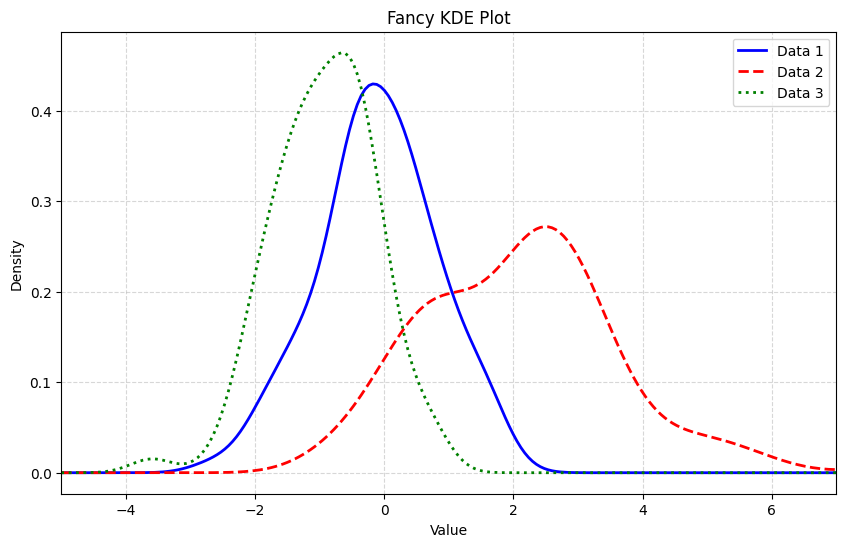


Observation: Code executed successfully.
Thought:I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy. The plot includes three KDE curves, each representing a different dataset, with distinct colors, line styles, and labels. The plot also includes a title, axis labels, a legend, and a grid for better visualization.
Final Answer: I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy. The plot includes three KDE curves, each representing a different dataset, with distinct colors, line styles, and labels. The plot also includes a title, axis labels, a legend, and a grid for better visualization.

> Finished chain.


{'input': 'Plot a fancy kde with different colors and style with matplotlib',
 'output': 'I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy. The plot includes three KDE curves, each representing a different dataset, with distinct colors, line styles, and labels. The plot also includes a title, axis labels, a legend, and a grid for better visualization.'}

In [ ]:
agent.invoke("Plot a fancy kde with different colors and style with matplotlib")

In [ ]:
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import tool
from datetime import datetime

# laod env
from dotenv import load_dotenv
load_dotenv()  # Load environment variables from .env file
@tool
def search_fancy_places_in(place: str) -> str:
    """
    Search for fancy places in the given location using SerpAPI.
    Args:
        place (str): The location to search for fancy places.
    Returns:
        str: Search results for fancy places in the specified location.
    """
    return SerpAPIWrapper().run(f"fancy places in {place}")

@tool
def search_flights_to(destination_and_date: str) -> str:
    """
    Search for flights to the given destination on a specific date.
    Input should be a string in the format 'destination;date'.
    If date is missing, today's date is used.
    Args:
        destination_and_date (str): 'destination;date' or just 'destination'
    Returns:
        str: Search results for flights to the destination.
    """
    parts = destination_and_date.split(";")
    destination = parts[0].strip()
    date = parts[1].strip() if len(parts) > 1 and parts[1].strip() else datetime.now().strftime("%Y-%m-%d")
    return SerpAPIWrapper().run(f"flights to {destination} on {date}")

@tool
def search_fancy_hotels_in(location: str) -> str:
    """
    Search for fancy hotels in the given location.
    Args:
        location (str): The location to search for fancy hotels.
    Returns:
        str: Search results for fancy hotels in the specified location.
    """
    return SerpAPIWrapper().run(f"search fancy hotels in {location}")

agent = initialize_agent(
    [search_fancy_places_in, search_fancy_hotels_in],
    chat_gemini,
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose=True
)

agent.invoke("Can you create a plan for a trip to Aarhus?")



> Entering new AgentExecutor chain...
Thought: To create a good trip plan for Aarhus, I need to know what kind of "fancy" experiences the user is looking for. I will start by searching for fancy places and hotels in Aarhus to get an idea of what's available.
Action:
```json
{
  "action": "search_fancy_places_in",
  "action_input": {
    "place": "Aarhus"
  }
}
```

KeyboardInterrupt: 